In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
dataset_sleep = pd.read_csv("C:/Users/ksmin/data_Science/dataset/Sleep_Data_Sampled.csv")
nRow, nCol = dataset_sleep.shape
print(dataset_sleep.info())
print(f'There are {nRow} rows and {nCol} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB
None
There are 1500

In [9]:
X = dataset_sleep.iloc[:, [2, 4, 5, 6, 10, 11]]
y = dataset_sleep[['Stress Level']]

String_X = dataset_sleep[['Gender','Occupation','BMI Category', 'Blood Pressure','Sleep Disorder']]
encoder = LabelEncoder()
encoded_X = String_X.apply(encoder.fit_transform)

# X 데이터에 encode된 결과를 추가
X = pd.concat([X, encoded_X], axis=1)

In [10]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_) 
#교차 검증을 5번 하였을 때 decision tree의 정확도는 93%이고 이 중 Stress level 영향력이 가장 큰 feature는 Sleep duration, physical activity level이다. 

Cross-validation scores: [0.86233333 0.986      0.99       0.95666667 0.884     ]
Average accuracy: 0.9357999999999999
[0.04104906 0.29320223 0.1361646  0.12844005 0.23162783 0.10844994
 0.00109785 0.0082682  0.00616371 0.0405738  0.00496273]


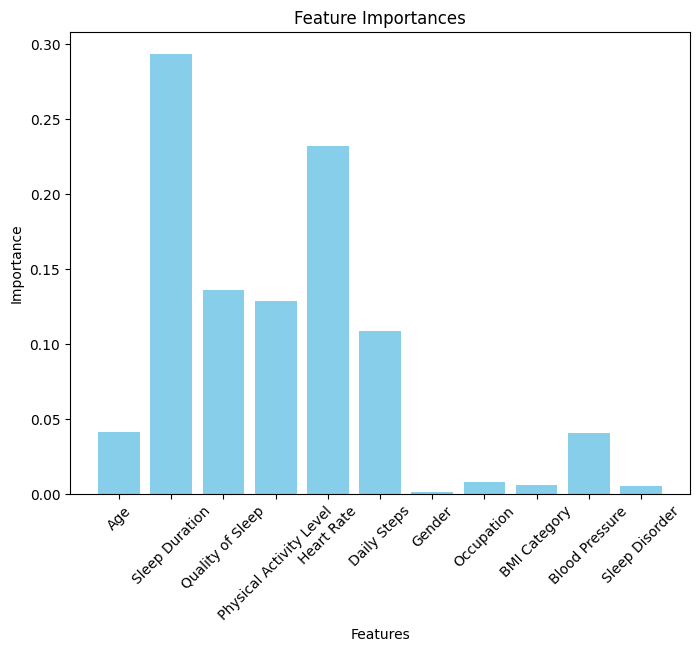

In [11]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()